In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('simple.csv', delimiter=',', names=['X','Y'])
df.sort_values(by=['X'], ascending=True, inplace=True, ignore_index=True)
df

,X,Y
0,0.5,0.7
1,1.0,1.1
2,1.1,0.9
3,1.5,1.6
4,1.9,2.2
5,2.0,1.6
6,2.2,2.9
7,2.3,2.7
8,2.5,2.4
9,3.1,3.0


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
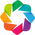

In [5]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

In [6]:
scatter = hv.Scatter(df)
scatter.opts(color='g', marker='o', size=15)
scatter.opts(xlabel="X", ylabel="Y", width=700, height=600, tools=['hover'],  toolbar= 'left',
         title="Пространство признаков", legend_position='bottom_right', show_grid=True)

:Scatter   [X]   (Y)

In [7]:
hv.help(hv.Scatter)

Scatter

Online example: https://holoviews.org/reference/elements/bokeh/Scatter.html

-------------
Style Options
-------------

	alpha, angle, cmap, color, fill_alpha, fill_color, hit_dilation, hover_alpha, hover_color, hover_fill_alpha, hover_fill_color, hover_line_alpha, hover_line_cap, hover_line_color, hover_line_dash, hover_line_dash_offset, hover_line_join, hover_line_width, line_alpha, line_cap, line_color, line_dash, line_dash_offset, line_join, line_width, marker, muted, muted_alpha, muted_color, muted_fill_alpha, muted_fill_color, muted_line_alpha, muted_line_cap, muted_line_color, muted_line_dash, muted_line_dash_offset, muted_line_join, muted_line_width, nonselection_alpha, nonselection_color, nonselection_fill_alpha, nonselection_fill_color, nonselection_line_alpha, nonselection_line_cap, nonselection_line_color, nonselection_line_dash, nonselection_line_dash_offset, nonselection_line_join, nonselection_line_width, palette, selection_alpha, selection_color, selection_fill

In [8]:
import hvplot
import hvplot.pandas
df.hvplot.explorer()

hvDataFrameExplorer(advanced=Advanced(explorer=..., name='Advanced00957', opts=None), axes=Axes(explorer=..., height=None, legend='bottom_right', logx=False, logy=False, name='Axes00951', responsive=True, shared_axes=True, width=None, xlim=None, ylim=None), by=[], code="df.hvplot(\n    kind='scatter',\n    x='index',\n    legend='bottom_right',\n    widget_location='bottom',\n)", colormapping=Colormapping(clim=None, cmap='kbc_r', cnorm='linear', color=None, colorbar=None, explorer=..., name='Colormapping00952', rescale_discrete_levels=True, symmetric=False), geographic=Geographic(crs=None, crs_kwargs={}, explorer=..., feature_scale='110m', features=None, geo=False, global_extent=None, name='Geographic00954', project=False, projection=None, projection_kwargs={}, tiles=None), groupby=[], kind='scatter', labels=Labels(clabel='', explorer=..., fontscale=1, name='Labels00953', rot=0, title='', xlabel='', ylabel=''), name='hvDataFrameExplorer00929', operations=Operations(aggregator=None, datashade=False, dynspread=False, explorer=..., name='Operations00955', rasterize=False, x_sampling=None, y_sampling=None), statusbar=StatusBar(live_update=True, name='StatusBar00944'), style=Style(alpha=1, explorer=..., name='Style00956'), x='index', y='X', y_multi=[], z=None)

In [9]:
from sklearn.cluster import KMeans
# строим модель кластеризации
model = KMeans(n_clusters=3, init='k-means++', max_iter=10, n_init=1, random_state = 123, verbose = 3)
model.fit(df)

Initialization complete
Iteration 0, inertia 2.28.
Iteration 1, inertia 1.364166666666667.
Converged at iteration 1: strict convergence.


KMeans(max_iter=10, n_clusters=3, n_init=1, random_state=123, verbose=3)

In [10]:
y=model.predict(df)
y

array([1, 1, 1, 2, 2, 2, 0, 0, 0, 0], dtype=int32)

In [11]:
centers = model.cluster_centers_
centers

array([[2.525     , 2.75      ],
       [0.86666667, 0.9       ],
       [1.8       , 1.8       ]])

In [12]:
import panel as pn
import hvplot.pandas

n_clusters = pn.widgets.IntSlider(name='n_clusters', start=1, end=10, value=1,  width = 250)

def get_clusters( n_clusters):
    model = KMeans(n_clusters=n_clusters, n_init=1, random_state = 123, verbose = 0)
    model.fit(df.iloc[:, 0:2].values)
    pred=model.fit_predict(df.iloc[:, 0:2].values)
    df['class'] = pred
    class_plot= df.sort_values('class').hvplot.scatter('X', 'Y', by='class', marker='o', size=200 )
    
    centers = model.cluster_centers_
    centers_plot= hv.Scatter(centers,  label='Class centers')
    centers_plot.opts(color='k', marker='x', size=15, line_width=5)
    
    fig = class_plot * centers_plot
    fig.opts(xlabel="X", ylabel="Y", width=700, height=600, tools=['hover'], toolbar= 'left',
         title="Пространство признаков", legend_position='top_left', show_grid=True)
    return ( fig ) 

pn.Row(
       
    pn.pane.HoloViews(
        pn.bind(get_clusters, n_clusters)
    ).servable(),
    pn.WidgetBox(
        pn.Column(
            "Кластеризация KMeans",
            n_clusters,
            height = 400,
            ).servable(target='sidebar')
    ),
)

Row
    [0] HoloViews(Overlay, height=600, sizing_mode='fixed', width=700)
    [1] WidgetBox
        [0] Column(height=400)
            [0] Markdown(str)
            [1] IntSlider(end=10, name='n_clusters', start=1, value=1, width=250)

In [13]:
df = pd.read_csv('circles.csv', delimiter=',', names=['X','Y'])
df.sort_values(by=['X'], ascending=True, inplace=True, ignore_index=True)

In [14]:
scatter = hv.Scatter(df) 
scatter.opts(color='g', marker='o', size=25)
fig =  scatter
fig.opts(xlabel="X", ylabel="Y", width=700, height=600, tools=['hover'], toolbar= 'left',
         title="Пространство признаков", show_grid=True)

:Scatter   [X]   (Y)

In [15]:
import panel as pn
import hvplot.pandas
import time

def draw_cluster(dfc, init_c):
   
    n_clusters = pn.widgets.IntSlider(name='n_clusters', start=1, end=15, value=init_c)
    def get_clusters( n_clusters):
        t0 = time.time()
        model = KMeans(n_clusters=n_clusters, n_init=10, random_state = 123, verbose = 0)
        model.fit(dfc.iloc[:, 0:2].values)
        pred=model.fit_predict(dfc.iloc[:, 0:2].values)
        dfc['class'] = pred
        class_plot= dfc.sort_values('class').hvplot.scatter('X', 'Y', by='class', marker='o', size=250 )

        centers = model.cluster_centers_
        centers_plot= hv.Scatter(centers,  label='Class centers')
        centers_plot.opts(color='k', marker='x', size=20, line_width=5)
        t1 = time.time()
        
        text_plot=hv.Text(1500,50,'Time: %.3f c.' %(t1-t0))

        fig = class_plot * centers_plot * text_plot
        fig.opts(xlabel="X", ylabel="Y", width=700, height=600, tools=['hover'], toolbar= 'left',
             title="Пространство признаков", legend_position='top', show_grid=True)
        return ( fig ) 

    return (
        pn.Row(
            pn.pane.HoloViews(
                pn.bind(get_clusters, n_clusters)
            ).servable(),
        pn.WidgetBox(
                pn.Column(
                    "Кластеризация KMeans++",
                    n_clusters
                ).servable(target='sidebar')
            )
        )
    )
    

In [16]:
draw_cluster(df,1)

Row
    [0] HoloViews(Overlay, height=600, sizing_mode='fixed', width=700)
    [1] WidgetBox
        [0] Column
            [0] Markdown(str)
            [1] IntSlider(end=15, name='n_clusters', start=1, value=1)

In [19]:
!pip install yellowbrick


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


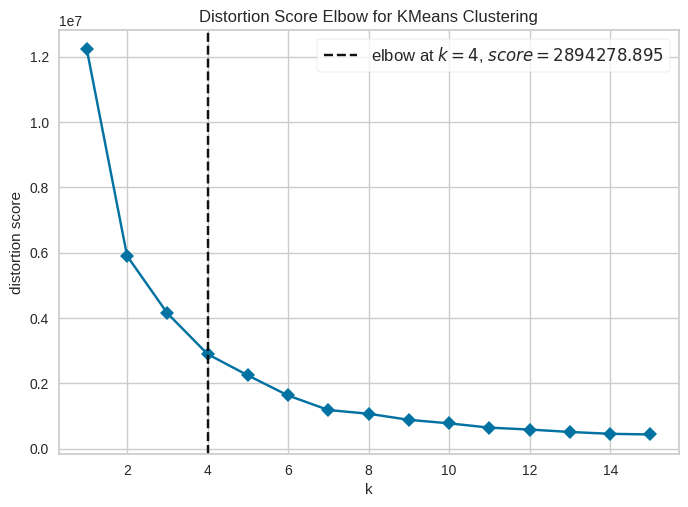

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from yellowbrick.cluster import KElbowVisualizer
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0, n_init='auto' )
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(1,16), timings=False)
# Fit the data and visualize
visualizer.fit(df)   
visualizer.poof() 

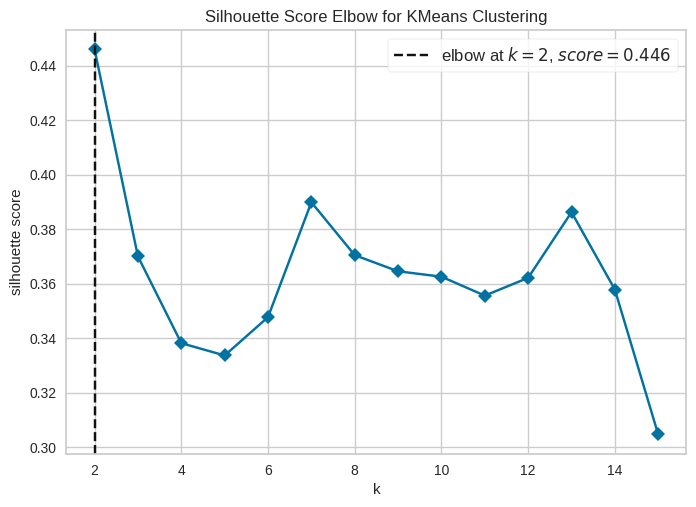

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [21]:
visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=False)
# Fit the data and visualize
visualizer.fit(df)   
visualizer.poof() 

In [ ]:
import import_ipynb
from pyclustertend import  vat,  ivat, hopkins

In [ ]:
np.random.seed(1234)
hopkins(df, df.shape[0])

In [ ]:
vat(df, figure_size=(10, 5))

In [ ]:
ivat(df, figure_size=(10, 5))